In [471]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime



In [472]:
input_path=r"C:\Users\HP\OneDrive\Desktop\1207_Assessment 4"
os.listdir(input_path)
movies=pd.read_csv(input_path+"\\Dataset.csv")
movies.sample(5)

,ID,Movie Name,Year,Timing(min),Rating(10),Votes,Genre,Language
49550,tt5611384,The Fighter,2007,-,-,-,Action,hindi
20321,tt11091658,Inject 0.7,2019,139 min,-,-,Thriller,kannada
856,tt0274888,Stage,1951,-,-,-,-,hindi
38719,tt4188582,Rendu Rellu Naluge,2014,150 min,4.3,9,Romance,telugu
49700,tt0234047,Kodungalluramma,1968,-,-,-,-,malayalam


In [473]:
movie = movies.copy()
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50602 entries, 0 to 50601
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           50602 non-null  object
 1   Movie Name   50602 non-null  object
 2   Year         49041 non-null  object
 3   Timing(min)  50602 non-null  object
 4   Rating(10)   50602 non-null  object
 5   Votes        50602 non-null  object
 6   Genre        50602 non-null  object
 7   Language     50602 non-null  object
dtypes: object(8)
memory usage: 3.1+ MB


Primary Inspection:
<br>In this dataset the Nan Values are denoted by(-), for that it is showing wrong no-null values
<br> We have to replace them with blank value and study further dataset


In [474]:
#Replacing (-) with blank
movie.replace("-",np.nan, inplace=True)
movie.isnull().sum()

ID              2508
Movie Name         0
Year            1561
Timing(min)    25892
Rating(10)     26926
Votes          26925
Genre           8581
Language           0
dtype: int64

In [475]:
blank_rows = movie[(movie['Rating(10)'].isna()) & 
                    (movie['Votes'].isna()) & 
                    (movie['Timing(min)'].isna()) & 
                    (movie['Genre'].isna()) & 
                    (movie['Year'].isna()) ]
blank_rows

,ID,Movie Name,Year,Timing(min),Rating(10),Votes,Genre,Language
216,NaN,Vivash,NaN,NaN,NaN,NaN,NaN,hindi
916,NaN,Mangalyam,NaN,NaN,NaN,NaN,NaN,malayalam
2990,NaN,Bhogi,NaN,NaN,NaN,NaN,NaN,tamil
3051,NaN,Daavu,NaN,NaN,NaN,NaN,NaN,tamil
3535,NaN,Redrum,NaN,NaN,NaN,NaN,NaN,tamil
...,...,...,...,...,...,...,...,...
48008,NaN,Kaaliyan,NaN,NaN,NaN,NaN,NaN,telugu
48226,NaN,Shakthi,NaN,NaN,NaN,NaN,NaN,tamil
49103,NaN,Untitled Mohanlal-Arun Gopy Film,NaN,NaN,NaN,NaN,NaN,malayalam
49324,NaN,Uyil Ondru,NaN,NaN,NaN,NaN,NaN,tamil


This data set contains 99 rows where Year, Timing, Rating, Votes and Genre has Null values which will not help in our analysis

In [476]:
#Drpoing the rows where Year, Timing, Rating, Votes and Genre column contains null value
movie.drop(movie[movie['Rating(10)'].isnull() &
                   movie['Votes'].isnull() &
                   movie['Timing(min)'].isnull() &
                   movie['Genre'].isnull() &
                   movie['Year'].isnull()].index, inplace=True)
movie

,ID,Movie Name,Year,Timing(min),Rating(10),Votes,Genre,Language
0,tt0398974,Dr. Shaitan,1960,NaN,NaN,NaN,NaN,hindi
1,tt1702558,Nadir Khan,1968,NaN,NaN,NaN,NaN,urdu
2,tt0493437,Apna Sapna Money Money,2006,134 min,5.3,"1,892","Comedy, Musical, Romance",hindi
3,tt0273405,Aag Aur Sholay,1987,NaN,2.2,20,NaN,urdu
4,tt0049595,Parivar,1956,NaN,7.4,21,"Comedy, Drama, Family",hindi
...,...,...,...,...,...,...,...,...
50597,tt2784720,Sulagte Armaan,1984,NaN,NaN,NaN,Drama,hindi
50598,tt0315201,Aranya,1971,107 min,NaN,NaN,Drama,assamese
50599,tt0270221,Balayogini,1936,120 min,NaN,NaN,NaN,telugu
50600,tt0388697,Alajadi,1990,133 min,NaN,NaN,Drama,telugu


In [477]:
#Finding Duplicate Values
duplicates = movie[movie['Movie Name'].duplicated(keep="first")]
duplicates

,ID,Movie Name,Year,Timing(min),Rating(10),Votes,Genre,Language
318,tt11423066,Alif Laila,1997–2002,NaN,NaN,NaN,"Adventure, Fantasy",urdu
568,tt11423562,Alif Laila,1997–2002,NaN,NaN,NaN,"Adventure, Fantasy",urdu
630,tt9631938,Premleela,2019,NaN,NaN,NaN,Romance,nepali
948,tt11423326,Alif Laila,1997–2002,NaN,NaN,NaN,"Adventure, Fantasy",urdu
1062,tt11423250,Alif Laila,1997–2002,NaN,NaN,NaN,"Adventure, Fantasy",urdu
...,...,...,...,...,...,...,...,...
50580,tt0378073,Hum Tum Aur Woh,1971,142 min,5.9,10,Drama,hindi
50582,tt14224118,Zanjeer,1975,NaN,NaN,NaN,NaN,urdu
50585,tt0329964,Aalu Magalu,1957,NaN,NaN,NaN,Drama,telugu
50594,tt0073191,Jai Santoshi Maa,1975,145 min,6.3,114,"Drama, Fantasy",hindi


In [478]:
# FInding Unique Movie names
Unique_movie_count=movie["Movie Name"].nunique()
Unique_movie_count

42361

In [479]:
#Removing Duplicates
movie = movie.drop_duplicates(subset='Movie Name', keep='first')
movie.info()


<class 'pandas.core.frame.DataFrame'>
Index: 42361 entries, 0 to 50601
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           40240 non-null  object
 1   Movie Name   42361 non-null  object
 2   Year         41027 non-null  object
 3   Timing(min)  20602 non-null  object
 4   Rating(10)   19055 non-null  object
 5   Votes        19056 non-null  object
 6   Genre        35139 non-null  object
 7   Language     42361 non-null  object
dtypes: object(8)
memory usage: 2.9+ MB


The Year, Timing(min), Rating(10), Votes column contains some other value apart from numeric values
<br> The Year Column is not in proper format and contains few anomalies
<br> The Timing(min) column is in string format and contains (min) after value also contains(,)in few cells
<br> The Ratings(10) column is in string format.
<br> The Votes column is in string format and contains (,) in few cells

In [480]:
pd.options.mode.chained_assignment = None

In [481]:
# Fixing Year Column
movie.loc[:,'Year'] = movie['Year'].fillna('')                                               # fill with blank if there is any gap
movie.loc[:,'Year'] = movie['Year'].astype(str)                                              # converting datatype to string
movie.loc[:,'Year'] = movie['Year'].apply(lambda x: x[:4] if x[:4].isdigit() else None)     # Extracting only 4 digit number
movie.loc[:,'Release_Year'] = pd.to_datetime(movie['Year'], errors='coerce')                 # Converting datatype to date_time
movie

,ID,Movie Name,Year,Timing(min),Rating(10),Votes,Genre,Language,Release_Year
0,tt0398974,Dr. Shaitan,1960,NaN,NaN,NaN,NaN,hindi,1960-01-01
1,tt1702558,Nadir Khan,1968,NaN,NaN,NaN,NaN,urdu,1968-01-01
2,tt0493437,Apna Sapna Money Money,2006,134 min,5.3,"1,892","Comedy, Musical, Romance",hindi,2006-01-01
3,tt0273405,Aag Aur Sholay,1987,NaN,2.2,20,NaN,urdu,1987-01-01
4,tt0049595,Parivar,1956,NaN,7.4,21,"Comedy, Drama, Family",hindi,1956-01-01
...,...,...,...,...,...,...,...,...,...
50596,tt8706884,Prassthanam,2019,141 min,5.8,"1,201","Action, Drama",hindi,2019-01-01
50597,tt2784720,Sulagte Armaan,1984,NaN,NaN,NaN,Drama,hindi,1984-01-01
50598,tt0315201,Aranya,1971,107 min,NaN,NaN,Drama,assamese,1971-01-01
50600,tt0388697,Alajadi,1990,133 min,NaN,NaN,Drama,telugu,1990-01-01


In [482]:
movie.loc[:,'Release_Year'] = movie['Release_Year'].fillna(pd.Timestamp.now())# fillung null values of Year Column by Current date, 
movie.loc[:,'Year'] = movie['Release_Year'].dt.year                           # So if we find current year for further analysis we will assume it as unknown Year
movie.loc[:,'Year'] = movie['Year'].astype('Int64')                           

In [483]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42361 entries, 0 to 50601
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ID            40240 non-null  object        
 1   Movie Name    42361 non-null  object        
 2   Year          42361 non-null  object        
 3   Timing(min)   20602 non-null  object        
 4   Rating(10)    19055 non-null  object        
 5   Votes         19056 non-null  object        
 6   Genre         35139 non-null  object        
 7   Language      42361 non-null  object        
 8   Release_Year  42361 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(8)
memory usage: 3.2+ MB


In [484]:
#Fixing Timing Column by  eleminating "min" 
movie.loc[:,'Timing(min)']=movie['Timing(min)'].astype(str)
movie.loc[:,'Timing(min)'] = movie['Timing(min)'].str.replace(',', '', regex=False)
movie.loc[:,'Timing(min)'] = movie['Timing(min)'].str.split(' ').str[0]

In [485]:
#Fixing Votes Column by eleminating (,)
movie.loc[:,'Votes'] = movie['Votes'].str.replace(',', '', regex=False)

In [486]:
#Converting The Numeric Column's Data Type
movie.loc[:,'Rating(10)'] = pd.to_numeric(movie['Rating(10)'], errors='coerce')
movie.loc[:,'Votes'] = pd.to_numeric(movie['Votes'], errors='coerce')
movie.loc[:,'Timing(min)'] = pd.to_numeric(movie['Timing(min)'], errors='coerce')
movie.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42361 entries, 0 to 50601
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ID            40240 non-null  object        
 1   Movie Name    42361 non-null  object        
 2   Year          42361 non-null  object        
 3   Timing(min)   20602 non-null  object        
 4   Rating(10)    19055 non-null  object        
 5   Votes         19055 non-null  object        
 6   Genre         35139 non-null  object        
 7   Language      42361 non-null  object        
 8   Release_Year  42361 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(8)
memory usage: 3.2+ MB


In [487]:
#Calculating Mean Of numeric Columns
mean_timing=np.ceil(movie['Timing(min)'].mean())
mean_rating=np.ceil(movie['Rating(10)'].mean())
mean_Votes=np.ceil(movie['Votes'].mean())

In [488]:
#Filling up null values of numerical columns by their mean to have a statistical overview and prevent data loss
movie.loc[:,'Timing(min)'] = movie['Timing(min)'].fillna(mean_timing)
movie.loc[:,'Rating(10)'] = movie['Rating(10)'].fillna(mean_rating)
movie.loc[:,'Votes'] = movie['Votes'].fillna(mean_Votes)
movie.loc[:,'Genre'] = movie['Genre'].fillna('Data Not Available')
movie = movie.infer_objects()
pd.set_option('future.no_silent_downcasting', True)


In [489]:
#Changing Datatype of Numeric columns
movie.loc[:,'Timing(min)'] = movie['Timing(min)'].astype(int)
movie.loc[:,'Votes'] = movie['Votes'].astype(int)
movie.loc[:,'Rating(10)'] = movie['Rating(10)']
movie.sample(10)

,ID,Movie Name,Year,Timing(min),Rating(10),Votes,Genre,Language,Release_Year
25520,NaN,Fanjar,2024,124.0,7.0,1158.0,Drama,marathi,2024-10-18 13:52:39.309636
23981,tt5226526,Ishaara: Call of Love,2006,124.0,7.0,1158.0,Thriller,hindi,2006-01-01 00:00:00.000000
42452,tt0398113,Hum Hain Khalnayak,1996,124.0,7.0,1158.0,Action,hindi,1996-01-01 00:00:00.000000
6703,tt0384610,Toofani Khazana,1937,124.0,7.0,1158.0,Data Not Available,hindi,1937-01-01 00:00:00.000000
45280,tt2605464,Wehshi Jatt,1975,128.0,6.4,10.0,Action,punjabi,1975-01-01 00:00:00.000000
11047,tt14350482,Kaloo,2002,124.0,7.0,1158.0,Data Not Available,punjabi,2002-01-01 00:00:00.000000
26273,tt3746632,Nimmakaayalu,2016,120.0,7.0,1158.0,Drama,telugu,2016-01-01 00:00:00.000000
24270,tt4432912,Song of Lahore,2015,82.0,7.3,172.0,"Documentary, Music",oriya,2015-01-01 00:00:00.000000
17984,tt3746524,Shamshaan,2000,124.0,7.0,1158.0,Horror,hindi,2000-01-01 00:00:00.000000
13760,tt12318790,Kismat 2,2016,148.0,7.0,1158.0,Drama,nepali,2016-01-01 00:00:00.000000


In [490]:
movie.describe()

,Year,Timing(min),Rating(10),Votes,Release_Year
count,42361.000000,42361.000000,42361.000000,42361.000000,42361
mean,1997.130450,123.869833,6.648873,1157.807677,1997-03-04 13:50:46.373391872
min,1913.000000,1.000000,1.000000,5.000000,1913-01-01 00:00:00
25%,1982.000000,124.000000,6.600000,54.000000,1982-01-01 00:00:00
50%,2004.000000,124.000000,7.000000,1158.000000,2004-01-01 00:00:00
75%,2016.000000,129.000000,7.000000,1158.000000,2016-01-01 00:00:00
max,2024.000000,2565.000000,10.000000,954861.000000,2024-10-18 13:52:39.309636
std,22.341082,33.847084,1.037657,8798.054325,NaN


Univariate Analysis:
1. Distribution of Ratings
2. Most Common Ratings Given 
3. Analyze Genre Distribution

In [491]:
# Analyzing the Distribution of Ratings
movie['Rating(10)'].describe()

count    42361.000000
mean         6.648873
std          1.037657
min          1.000000
25%          6.600000
50%          7.000000
75%          7.000000
max         10.000000
Name: Rating(10), dtype: float64

The above data shows:
1. There are 42,361 observations in this dataset,the mean score is 6.65, indicating that on average, ratings tend to be relatively high, slightly above the midpoint of 5.
2. The standard deviation is 1.037, meaning most scores are relatively close to the mean, suggesting consistency in ratings with moderate variability.
3. The lowest score is 1, and the highest is 10, which implies the full range of the scale was used by respondents.

Text(0, 0.5, 'Density')

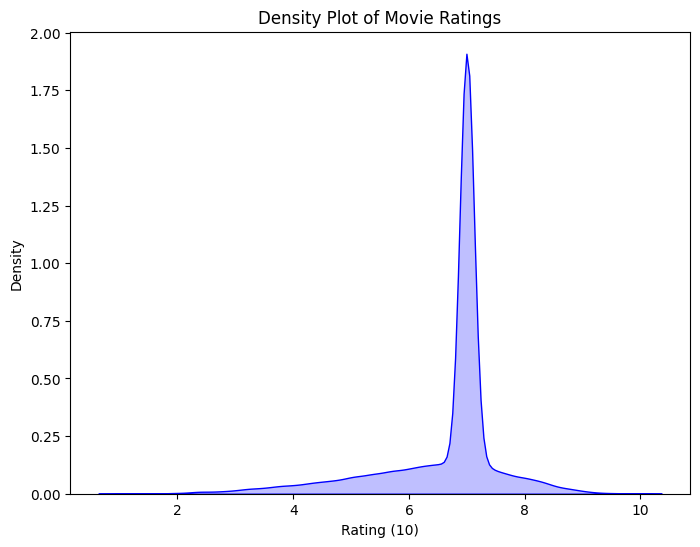

In [447]:
plt.figure(figsize=(8, 6))
sns.kdeplot(movie['Rating(10)'], fill=True, color='blue')


plt.title('Density Plot of Movie Ratings')
plt.xlabel('Rating (10)')
plt.ylabel('Density')

1. The sharp peak near ratings between 6 and 8 suggests that most movies receive ratings within this range. It shows a strong central tendency around this value, indicating that average ratings tend to cluster here.
2. The plot is somewhat symmetrical around the peak, but there's a slightly heavier tail towards higher ratings (8-10), implying that users tend to give slightly more positive ratings than negative ones.
3. The density in the lower rating range (below 4) is quite small, indicating that very few movies receive extremely low ratings. This suggests that the IMDb community might be reluctant to rate movies as extremely bad, or fewer low-quality movies exist in the dataset.
4. The density tapers off after rating 8, showing that very few movies get exceptionally high ratings (9 or above). This makes sense, as only a select few movies tend to be critically acclaimed and universally loved.
5. The distribution is quite narrow, meaning most ratings fall within a limited range (6-8). This indicates that users generally rate movies conservatively, with few movies being considered either very bad or outstandingly good


Key Insights:
<br>
  1.The majority of movies in your dataset are rated between 6 and 7, indicating a trend toward average or slightly above-average ratings.
<br>
  2.Movies with extremely high (9+) or low (below 4) ratings are rare.
<br>
  3.This distribution reflects a general tendency for users to provide moderate ratings, possibly influenced by the broader consensus or the fact that many movies hover around the "average" mark in quality.

In [492]:
#Analyze the Most Common Ratings Given 
most_common_rating=movie['Rating(10)'].mode()[0]
rating_count=movie['Rating(10)'].value_counts().sort_index()
print("Frequency of each rating:\n", rating_count)
print("\nMost common rating:", most_common_rating)

Frequency of each rating:
 Rating(10)
1.0      2
1.1      1
1.2      2
1.3      3
1.4      6
        ..
9.6     14
9.7      6
9.8      4
9.9      3
10.0     7
Name: count, Length: 91, dtype: int64

Most common rating: 7.0


In [493]:
# Analyzing Genre Distribution
df_cleaned_genre = movie[movie['Genre'] != ''].copy()
df_cleaned_genre['Genre'] = df_cleaned_genre['Genre'].str.split(',')
df_exploded_genre = df_cleaned_genre.explode('Genre').reset_index(drop=True)
df_exploded_genre['Genre'] = df_exploded_genre['Genre'].str.strip()
genre_distribution = df_exploded_genre['Genre'].value_counts()
genre_distribution


Genre
Drama                 20557
Data Not Available     7222
Action                 6141
Comedy                 5645
Romance                5387
Thriller               3494
Crime                  2112
Family                 2006
Short                  1569
Musical                1186
Horror                  937
Mystery                 921
Adventure               795
Fantasy                 709
Documentary             520
History                 427
Biography               423
Music                   334
Animation               203
Sport                   158
Sci-Fi                  140
War                     140
Talk-Show                56
Reality-TV               38
News                     25
Game-Show                11
Western                   8
Name: count, dtype: int64

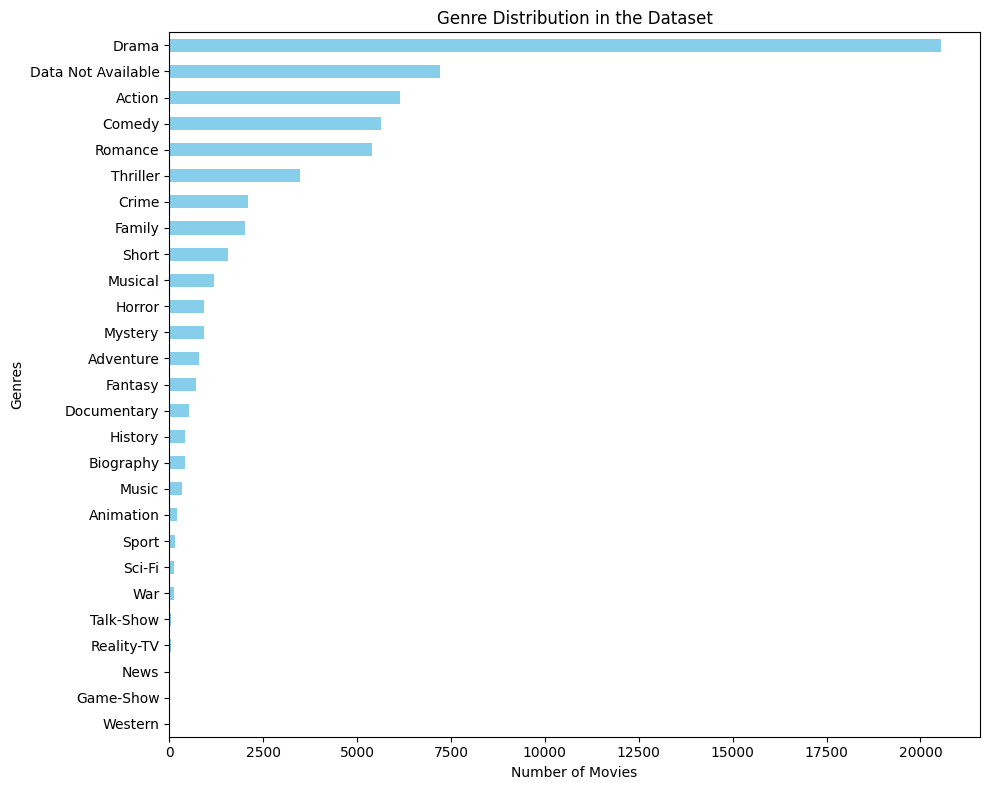

In [494]:
plt.figure(figsize=(10, 8))
genre_distribution.plot(kind='barh', color='skyblue')

# Adding labels and title
plt.xlabel('Number of Movies')
plt.ylabel('Genres')
plt.title('Genre Distribution in the Dataset')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Key Insights:
  1. Drama is overwhelmingly the most common genre, with over 20,000 movies classified under it. This reflects the genre's wide appeal, dealing with emotional narratives that resonate across different cultures.
  2.  Action, Romance, and Comedy together cover a significant portion of the dataset, highlighting their commercial and popular appeal in cinema.
  3.  Thriller and Crime also have a strong presence, suggesting a demand for suspense  in movies.
  4.  Animation, Sci-Fi, Sport, and War have much fewer entries, indicating either limited production or specialized audience preferences. For example, Sci-Fi has only 140 movies, while Animation has 203.
  5. Talk-Show, Reality-TV, News, Game-Show, and Western are extremely rare, each with fewer than 100 movies. These genres are typically more associated with TV programming than with movies.

Age and Gender Column has not been found

In [496]:
#Corelation between Ratings And Genre
genre_rating_correlation = df_exploded_genre.groupby('Genre')['Rating(10)'].mean().sort_values(ascending=False)
genre_rating_correlation

Genre
Documentary           7.173846
Short                 7.130210
News                  7.096000
History               7.083138
Biography             7.058865
Talk-Show             7.025000
War                   6.996429
Reality-TV            6.878947
Music                 6.868263
Data Not Available    6.859900
Game-Show             6.809091
Family                6.706530
Drama                 6.676767
Sport                 6.664557
Animation             6.638916
Musical               6.604300
Fantasy               6.577856
Sci-Fi                6.482857
Mystery               6.457329
Adventure             6.431447
Thriller              6.420063
Western               6.412500
Romance               6.408855
Crime                 6.286364
Comedy                6.253392
Action                6.186989
Horror                6.088794
Name: Rating(10), dtype: float64

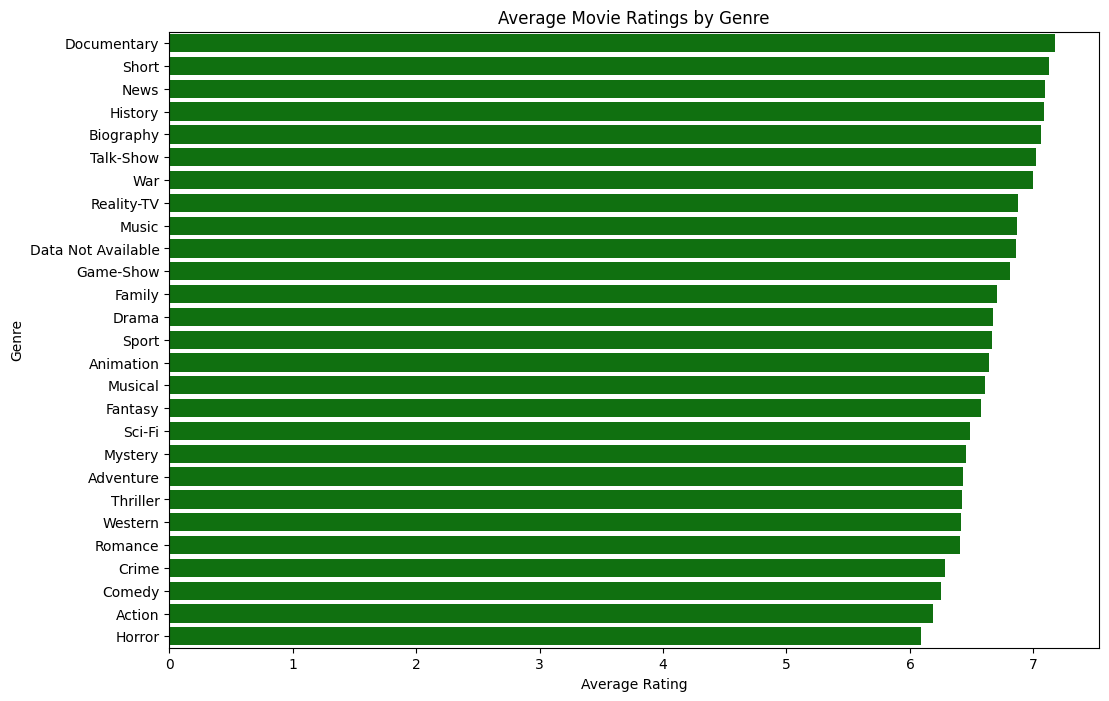

In [497]:
plt.figure(figsize=(12, 8))
sns.barplot(x=genre_rating_correlation.values, y=genre_rating_correlation.index, color="green", legend=False)
plt.title('Average Movie Ratings by Genre')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.show()

Key Insights
  1. Documentary (7.17), Short (7.13), and News (7.10) genres lead in average ratings, indicating that audiences tend to appreciate informative and concise storytelling. This suggests a preference for content that provides knowledge or insights.<br>
  2. Genres like War (6.99), Reality-TV (6.88), and Music (6.87) hover around the average rating mark. This might suggest that while they attract viewers, they often face mixed reviews, possibly due to formulaic content or varying execution quality.<br>
  3. Genres such as Family (6.71), Drama (6.68), and Sport (6.66) appear in the mid-to-low average ratings. This is interesting, as these genres typically cater to broad audiences. Lower ratings might indicate a saturation of content or unmet audience expectations.<br>
  4. Genres like Animation (6.64), Musical (6.60), and Fantasy (6.58) have lower ratings. This may point to a need for innovative storytelling or higher production quality to compete with other genres. Animation, in particular, could indicate a distinction between family-friendly animated films and more mature content.<br>
  5. Genres like Horror (6.09) and Action (6.19) have the lowest ratings, which might be attributed to a high volume of low-quality films or audience fatigue with typical tropes in these genres. The subjective nature of horror and action can also lead to greater variability in viewer satisfaction.

In [498]:
# The top 10 highest-rated movies.
top_10_movies = movie[['Movie Name', 'Rating(10)']].sort_values(by='Rating(10)', ascending=False).head(10)
top_10_movies.reset_index(drop=True, inplace=True)
top_10_movies

,Movie Name,Rating(10)
0,Antak,10.0
1,Ilu-Ilu,10.0
2,Ashi Fasli Nanachi Tang,10.0
3,Marasim - Beyond Borders,10.0
4,Bihari Binani,10.0
5,Harsukh,10.0
6,An Extraordinary Journey,10.0
7,The Invisible Humans,9.9
8,Maassab (The Teacher),9.9
9,The Survivor,9.9


In [499]:
#The top 10 most-watched movies (by the number of votes).
top_10_most_watched = movie[['Movie Name', 'Votes']].sort_values(by='Votes', ascending=False).head(10)
top_10_most_watched.reset_index(drop=True, inplace=True)
top_10_most_watched

,Movie Name,Votes
0,Iron Man,954861.0
1,Indiana Jones and the Raiders of the Lost Ark,894336.0
2,Star Wars: Episode I - The Phantom Menace,740452.0
3,3 Idiots,351187.0
4,Zero Dark Thirty,275912.0
5,The Jungle Book,261319.0
6,Eastern Promises,230284.0
7,Escape Plan,229488.0
8,Get Smart,205758.0
9,A Good Day to Die Hard,199575.0


In [500]:
#The top 10 most-watched movies (by the number of ratings).
top_10_most_watched = movie[['Movie Name', 'Rating(10)']].sort_values(by='Rating(10)', ascending=False).head(10)
top_10_most_watched.reset_index(drop=True, inplace=True)
top_10_most_watched

,Movie Name,Rating(10)
0,Antak,10.0
1,Ilu-Ilu,10.0
2,Ashi Fasli Nanachi Tang,10.0
3,Marasim - Beyond Borders,10.0
4,Bihari Binani,10.0
5,Harsukh,10.0
6,An Extraordinary Journey,10.0
7,The Invisible Humans,9.9
8,Maassab (The Teacher),9.9
9,The Survivor,9.9


In [501]:
# Top 5 Movie genres having higher average ratings.
movie_genres_with_high_average_ratings=df_exploded_genre.groupby('Genre')['Rating(10)'].mean().sort_values(ascending=False)
movie_genres_with_high_average_ratings.head(5)

Genre
Documentary    7.173846
Short          7.130210
News           7.096000
History        7.083138
Biography      7.058865
Name: Rating(10), dtype: float64

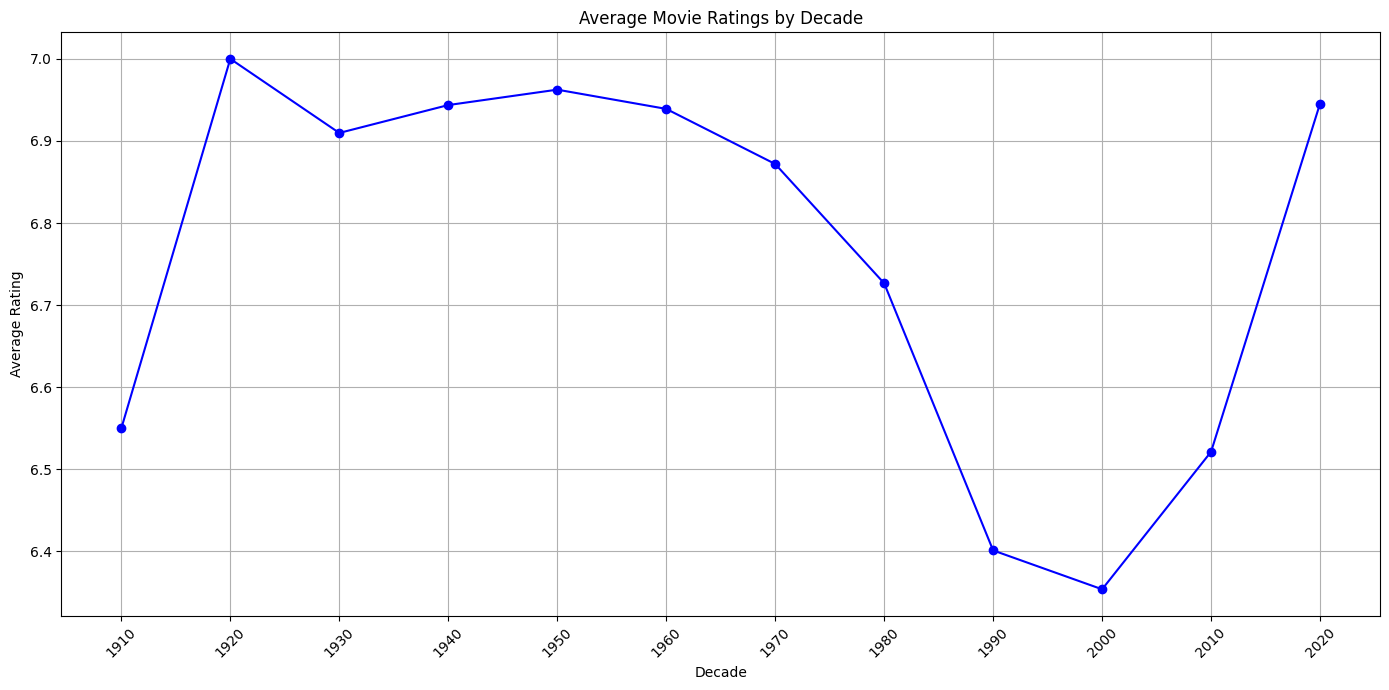

In [502]:
ratings_over_time = movie.groupby('Year')['Rating(10)'].mean().reset_index()
ratings_over_time['Decade'] = (ratings_over_time['Year'] // 10) * 10
average_ratings_by_decade = ratings_over_time.groupby('Decade')['Rating(10)'].mean().reset_index()
plt.figure(figsize=(14, 7))
plt.plot(average_ratings_by_decade['Decade'], average_ratings_by_decade['Rating(10)'], marker='o', linestyle='-', color='b')
plt.title('Average Movie Ratings by Decade')
plt.xlabel('Decade')
plt.ylabel('Average Rating')
plt.grid()
plt.xticks(average_ratings_by_decade['Decade'], rotation=45)
plt.tight_layout()
plt.show()

Key Insights
1. The graph starts in the 1910s with a modest rating around 6.6 but then peaks in the 1920s at around 7.0. This indicates that movies from the 1920s had higher average ratings compared to the following decades.<br>
2. From the 1930s to the 1960s, there’s a relatively stable period with slight fluctuations in ratings, hovering between 6.8 and 7.0. This suggests that during these decades, the quality of movies (based on ratings) remained consistently high.<br>
3. There’s a noticeable downward trend starting from the 1970s, where average movie ratings steadily decline, reaching their lowest point in the 2000s, around 6.4.This could reflect changing movie industry trends or audience expectations, with possibly fewer movies being highly rated during these years.<br>
4. The ratings start to increase again in the 2010s and reach another peak in the 2020s, back to around 7.0. This resurgence in ratings may be due to improvements in movie quality, innovations in filmmaking, or changing viewer preferences.

In [504]:
# Years Having highest average rating movies
ratings_over_time = movie.groupby('Year')['Rating(10)'].mean().sort_values(ascending=False).reset_index()
ratings_over_time.head(10)

,Year,Rating(10)
0,1930,7.150000
1,1948,7.024219
2,1953,7.022727
3,1950,7.019728
4,1949,7.016788
5,1938,7.013750
6,1955,7.010160
7,1947,7.006422
8,1915,7.000000
9,1929,7.000000


Conclutions:


I. Areas for Further Analysis:<br>

1. Genre Analysis:<br>
Explore how ratings vary across different movie genres. Certain genres may perform better over specific time periods, and understanding this trend can provide insight into audience preferences.<br>

2.  Director and Actor Influence:
Analyze the relationship between directors, actors, and movie ratings. High-rated movies might frequently feature specific directors or actors, which could suggest a strong influence on movie quality and audience reception.<br>

3. Budget vs. Ratings:
Investigate the relationship between production budgets and movie ratings. Higher-rated films may or may not have higher budgets, and understanding this relationship could reveal whether financial investment correlates with quality or success.<br>

4. Decade Comparison:
Compare movie ratings across different decades. This would provide a broader view of how audience preferences have shifted over time, highlighting which periods are most revered and why.
Audience vs. Critic Ratings.<br>

5. Age vs. Ratings:  Different age groups may have distinct preferences, tastes, or behaviors. For example, younger audiences might prefer certain genres or themes in movies, while older audiences might have different favorites.

6. Gender Comparison: Gender can influence genre preferences. For instance, research often shows that males might prefer action and adventure genres, while females might lean towards romance or drama.



II.Recommendations for Content Creators:<br>


1.	Focus on Quality: For genres with lower ratings, there may be opportunities for filmmakers to innovate and create fresh content that can resonate better with audiences.<br>
2.	Market Research: Understanding audience preferences and expectations for genres like Drama and Comedy can help in crafting stories that align with viewer interests.<br>
3.	Expand Successful Genres: Given the strong ratings for genres like Documentary and Biography, creators might consider expanding into related formats or topics to cater to this audience segment
